# Project: No-show Appointments
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
We are going to analyze **No-show Appointments** dataset with a systematic data analysis process. The main objective of our analysis is to find what factors are highly associated with patients' non-showing up to their scheduled appointments. Our analysis will run through phases summarized below:

1.**Asking Questions:** In this phase, we will brainstorm and investigate the problem of patients’ no-showing-up to scheduled appointments with questions below:
* What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
  showing-up to scheduled appointments? 
* Are sending messages and scholarship highly associated with patients’ showing-up to scheduled appointments? 
* Which months and days are patients showing up or not showing to their appointments?
    
2.**Data Wrangling:** In this phase, we will assess and clean our dataset to be able to perform our exploratory data analysis. This initial phase will include some operations such as assessing how the dataset is structured, what the data types of attributes are, checking missing data and duplicates, describing the summary statistics of the dataframe, renaming and lowering-case of the headers to facilitate queries and reaching our attributes, fixing data types issues, dropping some unnecessary attributes or rows and extracting some columns to support our validation of assumptions and data analysis.

3.**Performing Exploratory Data Analysis:** In EDA, we will focus our analysis on finding some patterns and models, and presenting some visualizations that display the correlations and associations of variables in our dataset.

4.**Drawing Conclusions:** In this phase, we are going to run some descriptive statistical analysis to answer the posed questions.

5.**Communicating Results:** In this final phase, we will provide and attach a written HTML report detailing the most important variables affecting patients’ showing-up to scheduled appointments.


In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling: Loading Data, Assessing Data and Cleaning Data.


### First: Loading Data

In [265]:
# Loading the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Second: Assessing Data

In [266]:
# Printing the first 5 rows of the dataset to know how the data is sructured
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [267]:
# Printing the last 5 rows of the dataset to validate the dataset structure
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [268]:
# Checking how many rows and columns in the dataframe
df.shape

(110527, 14)

In [269]:
# Getting a general overview of the dataframe and what are the data types of each attribute
# and if there is mising data or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [270]:
# Checking missing values in the dataframe
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [271]:
# checking duplicated values in the dataframe
df.duplicated().sum()

0

In [272]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [273]:
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [274]:
# Presenting summary statistics of the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Summary of Assessing Data:
After assessing data, we found that:
1. The dataset has a shape of ``110527 rows`` and ``14 columns``.
2. There are no missing or duplicated values in the dataset.
3. The dataframe values are unique. All has values of `0` or `1` to represent the attributes applied to a specific appointment. However, we inquired the attribute ``Handcap`` as it has 5 unique values from `0` up to `4` and it seems that these values represent the hancap degree.
4. Based on the dataframe assessment:
* Columns ``PatientId`` and	``AppointmentID`` are not necessary so we can drop them.
* There is one value in `Age` column with negative value of `-1`.
* There are 2 columns with inncorrect `object` data type: `ScheduledDay` and `AppointmentDay`.
* The header names don't have a standard format of python so we will rename them later.
5. From the descriptive statistics, we can found that:
* The standard deviation of variables is very small and values are clustered around the mean, except for the `Age` variable which has very high std as there is big variance in ages of patients.
* The mean of ages is ``37`` and all means of variables is very low. Most important, the mean of ``SMS_received`` is ``0.32`` which is a big question mark.
* The min value of Age variable is `-1` and we think it is better to drop it.


### Third: Cleaning Data: Fixing Issues Found in Assessmnet Phase

In [275]:
# Dropping Columns PatientId and AppointmentID
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [276]:
# Droping row with value -1 in Age column
# First: we look for the row with the issue
df.query('Age == -1')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [277]:
# Second: we confirm that the index has the value creates the issue before dropping the row
df.Age[99832]

-1

In [278]:
# Third: Dropping the Age row with 1- value
df.drop([df.index[99832]], axis =0,inplace= True)

In [155]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [156]:
# Confirming the the Age min value has been corrected
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [157]:
# Fixing data types of ScheduledDay and AppointmentDay columns
# First: coverting the data type od dates from object to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [158]:
# Second: Confirming that both data types of ScheduledDay and AppointmentDay columns have been corrected
df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [159]:
# Renaming column names to standard Python naming to facilitate analysis
# First: Loweringcase of all header names
df.columns = df.columns.str.lower()

In [160]:
# Second: Renaming scheduledday, appointmentday and no-show column names
df.rename(columns={'scheduledday': 'scheduled_day'}, inplace=True)
df.rename(columns={'appointmentday': 'appointment_day'}, inplace=True)
df.rename(columns={'no-show': 'no_show'}, inplace=True)


In [161]:
# Finally confirming that headers are lowercased and renamed
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [162]:
# Extracting Months and Days from scheduled_day and appointment_day columns
# First: Extracting Months and Days from scheduled_day column
df['schedule_month'] = df['scheduled_day'].dt.month
df['schedule_day'] = df['scheduled_day'].dt.day

# Second: Extracting Month and Day from appointment_day column
df['app_month'] = df['appointment_day'].dt.month
df['app_day'] = df['appointment_day'].dt.day

In [163]:
# Confirming extraction of Months and Days from scheduled_day and appointment_day columns
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,schedule_month,schedule_day,app_month,app_day
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,29,4,29
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,29,4,29
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,29,4,29
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,29,4,29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,29,4,29


### Summary of Cleaning Data :
In cleaning data phase, we have taken the following steps:
1. Dropped Columns PatientId and AppointmentID as no need for them in our analysis.
2. Dropped the row with index `99832` and value `-1` in Age column. It seems a typo and makes an outlier in the data.
3. Fixed the data types of `ScheduledDay` and `AppointmentDay` columns to `datetime64[ns, UTC]` 
4. Renamed header names to match standard Python naming and to facilitate our analysis.
5. Extracted `Months and Days` from `scheduled_day` and `appointment_day` columns to be able to perform some grouping and filtering.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

### 1. Exploring Percents of People Who Did/Didn't Showed up

In [164]:
# Exploring the dataset in general
df['no_show'].value_counts(normalize=True)

No     0.798066
Yes    0.201934
Name: no_show, dtype: float64

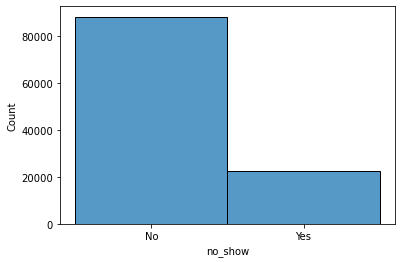

In [165]:
# Plotting the percent of who showed up vs.who didn't
sns.histplot(data=df, x="no_show");

### 2. Exploring Each Attribute Individually

### Exploring Gender Attribute

In [166]:
# Exploring the Gender proportions
df['gender'].value_counts(normalize=True)

F    0.649974
M    0.350026
Name: gender, dtype: float64

In [167]:
# Exploring the correlation of gender to appointments attendance
df.groupby('no_show').gender.value_counts(normalize=True, ascending=True) 

no_show  gender
No       M         0.351015
         F         0.648985
Yes      M         0.346118
         F         0.653882
Name: gender, dtype: float64

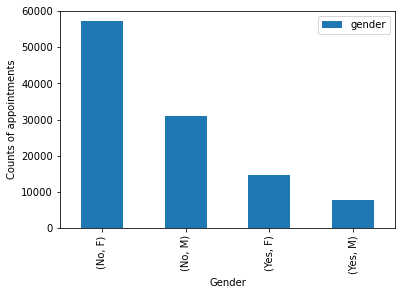

In [168]:
# Plotting the the the correlation of gender to appointments attendance
df.groupby('no_show').gender.value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Counts of appointments')
plt.legend();

### Exploring Age Attribute

In [169]:
# Exploring the correlation of age to appointments attendance
# Frist: Exporing the mean age of patients
df.age.mean()

37.089218826339504

In [170]:
# Second: Exporing the median age of patients
df.age.median()

37.0

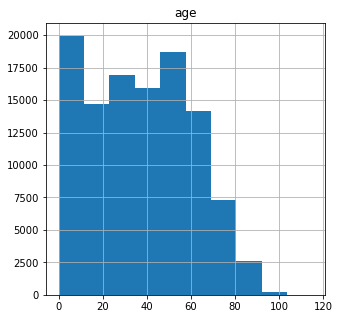

In [171]:
# Third: Plotting the distribution of the ages of patients
df.hist('age', figsize=(5, 5));

In [172]:
# Fouth: Exploring the counts of patients and how they are allocated by showin-up status
df.groupby('no_show').age.value_counts(ascending=True)

no_show  age
No       99       1
         102      2
         115      2
         100      4
         98       5
               ... 
Yes      30     369
         19     394
         17     396
         1      415
         0      639
Name: age, Length: 203, dtype: int64

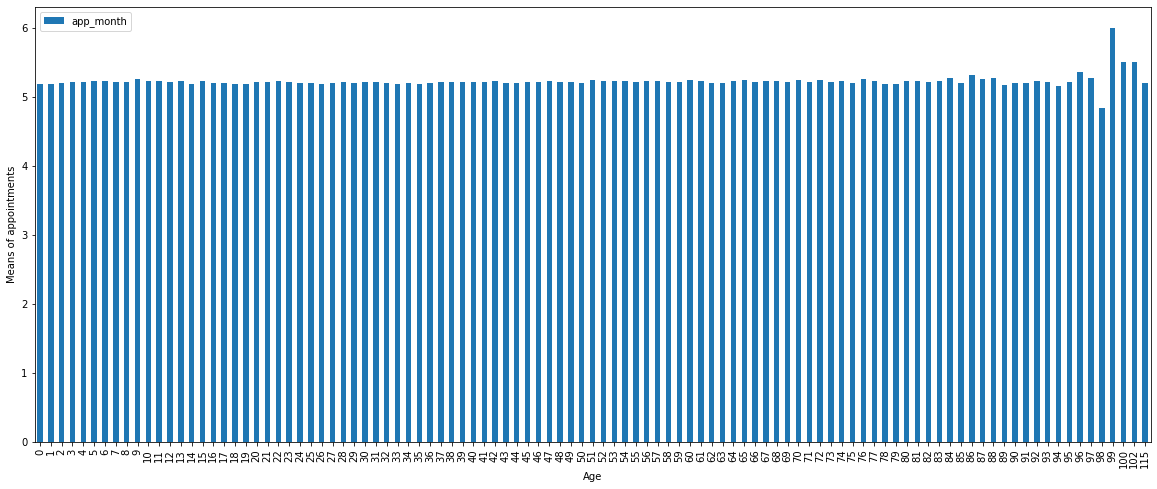

In [173]:
df.groupby('age').app_month.mean().plot(kind='bar', figsize=(20, 8))
plt.xlabel('Age')
plt.ylabel('Means of appointments')
plt.legend();

### Exploring Neighbourhood Attribute

In [174]:
# Exploring the correlation of neighbourhood to appointments attendance
df.groupby('no_show').neighbourhood.value_counts(normalize=True, ascending=False)

no_show  neighbourhood              
No       JARDIM CAMBURI                 0.070879
         MARIA ORTIZ                    0.051991
         RESISTÊNCIA                    0.039963
         JARDIM DA PENHA                0.036800
         SANTA MARTHA                   0.029873
                                          ...   
Yes      PONTAL DE CAMBURI              0.000538
         ILHA DO BOI                    0.000134
         ILHA DO FRADE                  0.000090
         ILHAS OCEÂNICAS DE TRINDADE    0.000090
         AEROPORTO                      0.000045
Name: neighbourhood, Length: 160, dtype: float64

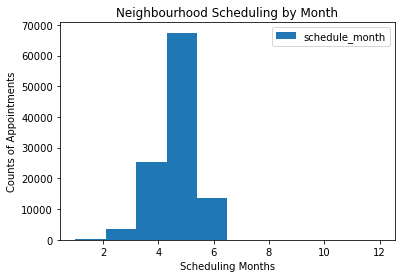

In [175]:
df.plot(x='neighbourhood', y='schedule_month', kind='hist')
plt.xlabel('Scheduling Months')
plt.ylabel('Counts of Appointments')
plt.title('Neighbourhood Scheduling by Month')
plt.legend();



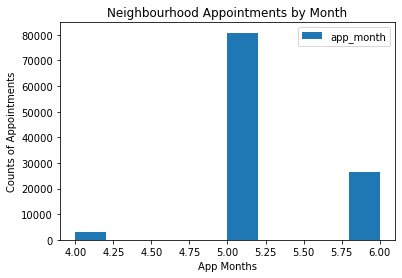

In [176]:
df.plot(x='neighbourhood', y='app_month', kind='hist')
plt.xlabel('App Months')
plt.ylabel('Counts of Appointments')
plt.title('Neighbourhood Appointments by Month')
plt.legend();

### Exploring Disease Attributes

In [177]:
# Exploring the correlation of hipertension to appointments attendance
df.groupby('no_show').hipertension.value_counts(normalize=True, ascending=False) 

no_show  hipertension
No       0               0.795606
         1               0.204394
Yes      0               0.830996
         1               0.169004
Name: hipertension, dtype: float64

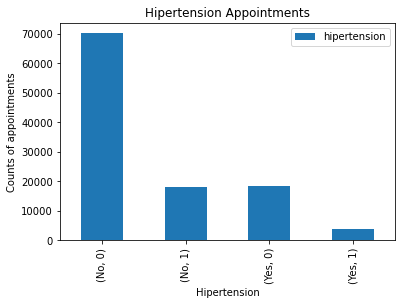

In [178]:
df.groupby('no_show').hipertension.value_counts().plot(kind='bar')
plt.xlabel('Hipertension')
plt.ylabel('Counts of appointments')
plt.title('Hipertension Appointments')
plt.legend();

In [179]:
# Exploring the correlation of diabetes to appointments attendance
df.groupby('no_show').diabetes.value_counts(normalize=True, ascending=False) 

no_show  diabetes
No       0           0.926162
         1           0.073838
Yes      0           0.935929
         1           0.064071
Name: diabetes, dtype: float64

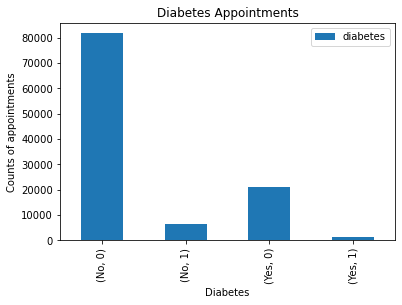

In [180]:
df.groupby('no_show').diabetes.value_counts().plot(kind='bar')
plt.xlabel('Diabetes')
plt.ylabel('Counts of appointments')
plt.title('Diabetes Appointments')
plt.legend();

In [181]:
# Exploring the correlation of alcoholism to appointments attendance
df.groupby('no_show').alcoholism.value_counts(normalize=True, ascending=False) 

no_show  alcoholism
No       0             0.969583
         1             0.030417
Yes      0             0.969667
         1             0.030333
Name: alcoholism, dtype: float64

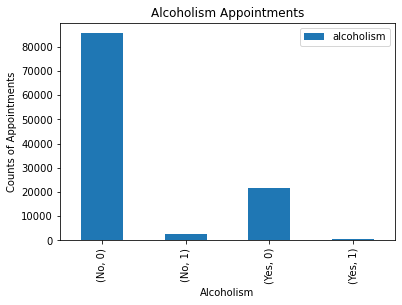

In [182]:
df.groupby('no_show').alcoholism.value_counts().plot(kind='bar')
plt.xlabel('Alcoholism')
plt.ylabel('Counts of Appointments')
plt.title('Alcoholism Appointments')
plt.legend();

In [183]:
# Exploring the correlation of handcap to appointments attendance
df.groupby('no_show').handcap.value_counts(normalize=True) 

no_show  handcap
No       0          0.979208
         1          0.019001
         2          0.001655
         3          0.000113
         4          0.000023
Yes      0          0.981764
         1          0.016399
         2          0.001658
         3          0.000134
         4          0.000045
Name: handcap, dtype: float64

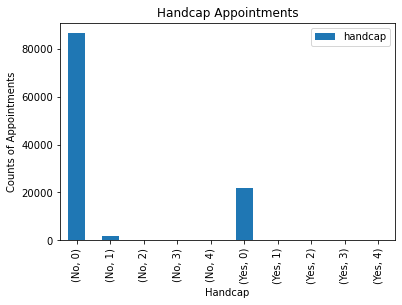

In [184]:
df.groupby('no_show').handcap.value_counts().plot(kind='bar')
plt.xlabel('Handcap')
plt.ylabel('Counts of Appointments')
plt.title('Handcap Appointments')
plt.legend();

### Research Question 2: Are sending messages and scholarship highly associated with patients’ showing-up to scheduled appointments?

### Exploring SMS Receiving Attribute

In [185]:
# Exploring the correlation of receiving messages to the appointments attendance
df.groupby('no_show').sms_received.value_counts(normalize=True, ascending=False) 

no_show  sms_received
No       0               0.708663
         1               0.291337
Yes      0               0.561629
         1               0.438371
Name: sms_received, dtype: float64

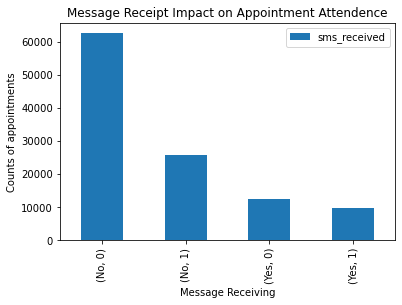

In [186]:
df.groupby('no_show').sms_received.value_counts().plot(kind='bar')
plt.xlabel('Message Receiving')
plt.ylabel('Counts of appointments')
plt.title('Message Receipt Impact on Appointment Attendence')
plt.legend();

### Exploring Scholarship Attribute

In [187]:
# Exploring the correlation of scholarship to the appointments attendance
df.groupby('no_show').scholarship.value_counts(normalize=True, ascending=False)

no_show  scholarship
No       0              0.906096
         1              0.093904
Yes      0              0.884493
         1              0.115507
Name: scholarship, dtype: float64

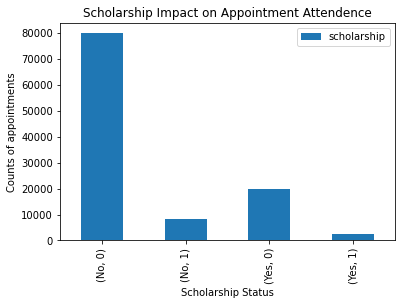

In [188]:
# Plotting the correlation of scholarship to the appointments attendance
df.groupby('no_show').scholarship.value_counts().plot(kind='bar')
plt.xlabel('Scholarship Status')
plt.ylabel('Counts of appointments')
plt.title('Scholarship Impact on Appointment Attendence')
plt.legend();

### Research Question 3: Which months and days are patients showing up or not showing to their appointments?

### Exploring Months and Days Attributes

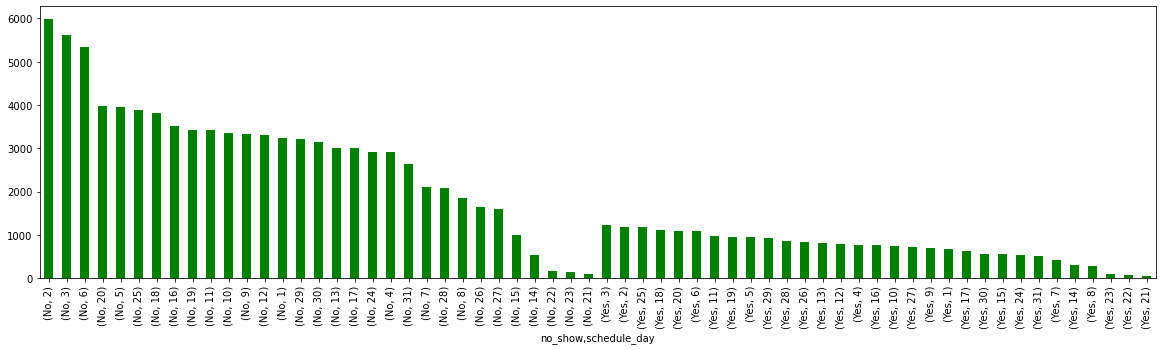

In [189]:
# Plotting the distribution of schedule_day based on appointment attendence
df.groupby('no_show')['schedule_day'].value_counts().plot(kind='bar', figsize=[20, 5], color='g');

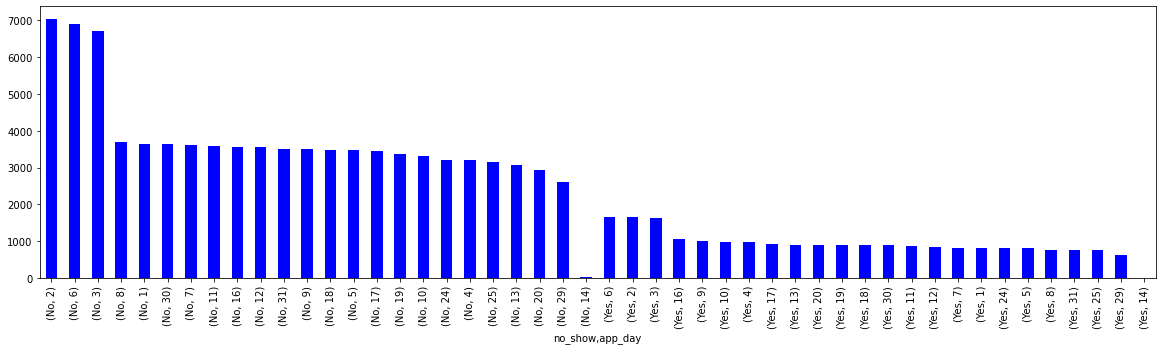

In [190]:
# Plotting the distribution of app_day based on appointment attendence
df.groupby('no_show')['app_day'].value_counts().plot(kind='bar', figsize=[20, 5], color='b');

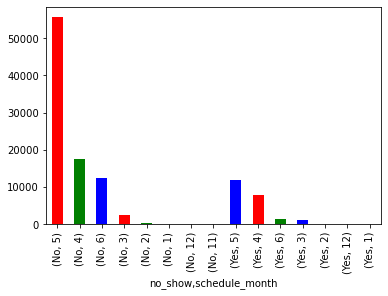

In [191]:
# Plotting the distribution of schedule_month based on appointment attendence
df.groupby('no_show')['schedule_month'].value_counts().plot(kind='bar', color=['r', 'g', 'b']);

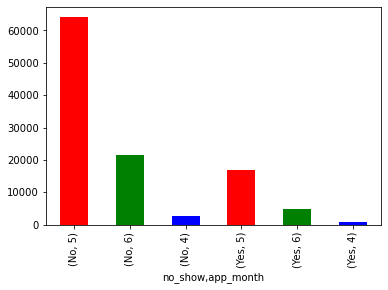

In [192]:
# Plotting the distribution of app_month based on appointment attendence
df.groupby('no_show')['app_month'].value_counts().plot(kind='bar', color=['r', 'g', 'b']);

In [193]:
# Exploring the mean of schedule_month
df.schedule_month.mean()

4.8238604491250925

In [194]:
# Exploring the median of schedule_month
df.schedule_month.median()

5.0

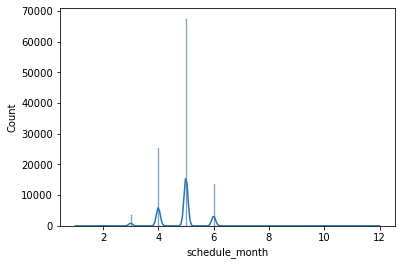

In [195]:
# Plotting the distribution of schedule_month to the appointments attendance
sns.histplot(data=df, x="schedule_month", kde=True);

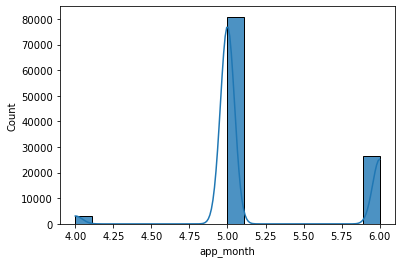

In [196]:
# Plotting the distribution of app_month to the appointments attendance
sns.histplot(data=df, x="app_month", kde=True, alpha=.8);

In [197]:
# Exploring the mean of app_month
df.app_month.mean()

5.210041076307837

In [198]:
# Exploring the median of app_month
df.app_month.median()

5.0

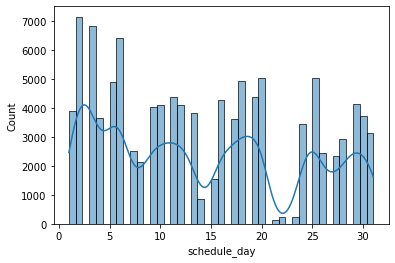

In [199]:
# Plotting the distribution of schedule_day to the appointments attendance
sns.histplot(data=df, x="schedule_day", kde=True);

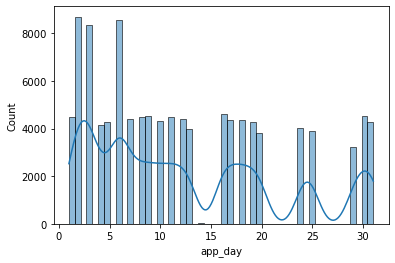

In [200]:
# Plotting the distribution of app_day to the appointments attendance
sns.histplot(data=df, x="app_day", kde=True);

### Exploratory Data Analysis Observations and Findigs:
**After exploring the dataset, we found that:**
1. **For the whole dataset:**
    *people who did show up to their appointments are estimated to `79.8%` while these people didn't show up are estimated to `20,2%`.
2. For Gender Attribute, females' appointments are estimated to `65%` of total appointments while those of males' are estimated to `35%`. Females are `64.9%` of total people who showed up to their appointments while males are `35.1%`. Females are `65.4%` of total people who didn't show up to their appointments while males are `34.6%`.
3. **For Age Attribute:**
    * The mean age is `37`, the mean age for each age year is evenly distrubuted at `5` appointments per age year, except for age of `99` has higher mean of `6`, and finally the data distribution of ages has a positive skewness to the right with most of ages are distributed from `0` age to `70`. Most of peaple who didn't show up are those who has `<= 30 years-old`.
4. **For Neighborhood:**
    * Neighborhoods with the highest attendance of appointments respectively include `JARDIM CAMBURI, MARIA ORTIZ, RESISTÊNCIA, JARDIM DA PENHA, JARDIM DA PENHA, and SANTA MARTHA`; and those with the least attendance of appointments respectively include `AEROPORTO, ILHAS OCEÂNICAS DE TRINDADE, ILHA DO FRADE, ILHA DO BOI, and PONTAL DE CAMBURI`. `The Neighbourhood Scheduling by Month has a negative skewness to the left` (most scheduling occured in months 4 and 5) while the `Neighbourhood Appointment  by Month has a positive skewness to the right` (most appointments are scheduled to months 5 and 6).
5. **For Diseases:**
    * People who suffers from hipertension counts for `20.4%` of people who showed up and `16.9%` of people who didn't show up.
    * People who suffers from diebetes counts for `7%` of people who showed up and `6%` of people who didn't show up.
    * People who suffers from alchoholism counts for `3%` of people who showed up and `3%` of people who didn't show up.
    * People who suffers from alchoholism counts for `2.3%` of people who showed up and `1.2%` of people who didn't show up.
6. **For SMS Receipt:**
    * People who didn't receive SMS and showed up counts for `70.8%` while those who received SMS and showed up counts for `29.2%`. Similary, people who didn't receive SMS and didn't show up counts for `56.2%` while those who received SMS and didn't up counts for `43.8%`.
7. **For Scholarship:**
    * People who doesn't have a scholarship and showed up counts for `90.6%` while those who has a scholarship and showed up counts for `9.4%`. Similary, who doesn't have a scholarship and didn't show up counts for `88.4%` while those who has a scholarship and didn't up counts for `11.6%`.
8. **For Showing/No-showing-up by Timing:**
    * The highest, days of no-show are `2, 3, 6` and they are also the same highest days of showing up. 
    * In contrast, the lower days of no-show are `8, 31, 25 and 29` and the least day is `14`, while the lower days of showing up are `24, 4, 25, 13, 20 and 29`, and the least day is `14` again.
    * The sequesnce of no-show by schedule month is `5, followed by 4, 6 and 3`, while months of showing up are `5, followed by 4, 6, 3 and 2`.  
    * The sequesnce of no-show by schedule month is `5, followed by 6 and 4`, while months of showing up similarly are `5, followed by 6 and 4`.
    * `Schedule Months have a negative skewness to the left` (median > mean) while `Appointment Months has a positive skewness to the right`(median < mean).
    * `Scheduling days have 4 peaks` with the highest peak from day `1 up to 8, followed by 9 up to 13, 15 up to 20, and 24 up to 30`, while the lowest scheduling days are `14 and 21-23`.
    * `Appointments have 4 peaks` with the highest peak from `1 up to 13, followed by 16 up to 20, 24 up to 25, and 29 up to 31`, while the lowest day of appointments is `14` and days without appointments are `15, 21-23, and 26-28 (i.e. there are 7 days in a month without appointments)`.

<a id='conclusions'></a>
## Conclusions


### First: Creating Masks to Filter All Attributes and to Draw Conclusions Regarding Most Important Variables

In [201]:
# Creating a mask to filter data based on no_show dependent variable
df_noshow = df.query('no_show == "Yes"')
df_showed = df.query('no_show == "No"')

### Second: Filtering Each Variable Based on `df_noshow` And `df_showed`

#### 1. Conclusion for SMS Receipt

In [202]:
# What is the mean of SMS received by people who showed up or people who didn't show up to their appointments
df_noshow.sms_received.mean(), df_showed.sms_received.mean()

(0.43837089475334917, 0.29133742220005215)

In [203]:
# What is the count of SMS received by people who showed up or people who didn't show up to their appointments
df_noshow.sms_received.value_counts(normalize=True), df_showed.sms_received.value_counts(normalize=True)

(0    0.561629
 1    0.438371
 Name: sms_received, dtype: float64,
 0    0.708663
 1    0.291337
 Name: sms_received, dtype: float64)

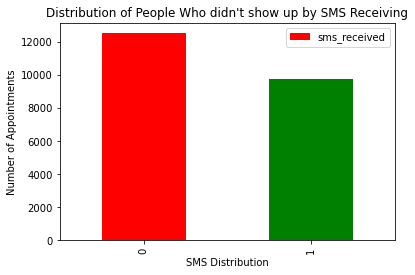

In [204]:
# Plotting People who didn't show up and dividing them into 2 groups: '0' = didn't receive SMS, '1'= received SMS
df_noshow.sms_received.value_counts().plot(kind='bar', color = ['r', 'g'])
plt.xlabel('SMS Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who didn't show up by SMS Receiving")
plt.legend();

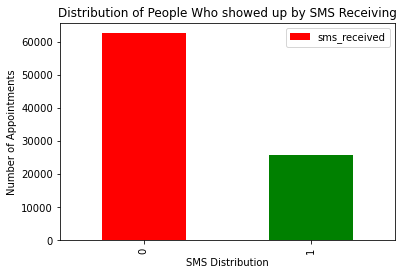

In [205]:
# Plotting People who showed up and dividing them into 2 groups: '0' = didn't receive SMS, '1'= received SMS
df_showed.sms_received.value_counts().plot(kind='bar', color = ['r', 'g'])
plt.xlabel('SMS Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who showed up by SMS Receiving")
plt.legend();

#### 2. Conclusion for Age Attribute

In [206]:
# What is the mean of Age for people who showed up or people who didn't show up to their appointments
df_noshow.age.mean(), df_showed.age.mean()

(34.31766656212196, 37.790504154999034)

In [207]:
# What is the count of each Age for people who showed up or people who didn't show up to their appointments
df_noshow.age.value_counts(normalize=True), df_showed.age.value_counts(normalize=True)

(0      0.028630
 1      0.018594
 17     0.017743
 19     0.017653
 30     0.016533
          ...   
 95     0.000269
 115    0.000134
 97     0.000090
 96     0.000045
 98     0.000045
 Name: age, Length: 100, dtype: float64,
 0      0.032877
 1      0.021064
 52     0.016427
 56     0.015554
 2      0.015486
          ...   
 98     0.000057
 100    0.000045
 102    0.000023
 115    0.000023
 99     0.000011
 Name: age, Length: 103, dtype: float64)

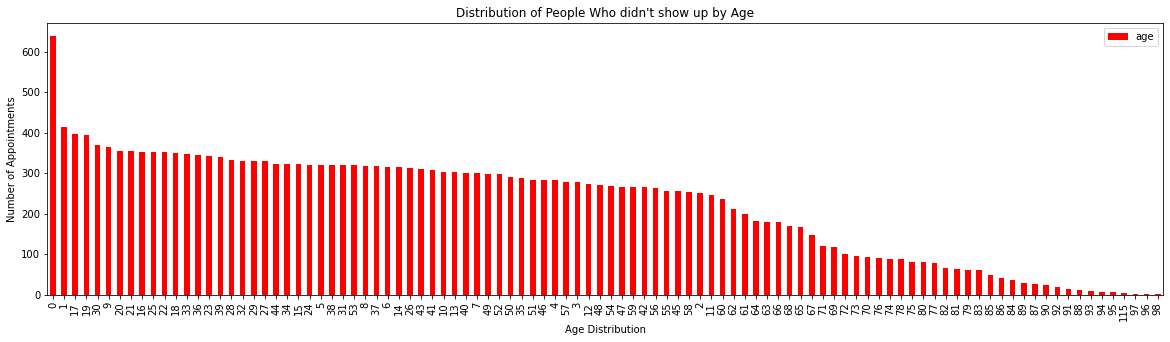

In [208]:
# Plotting People who didn't show up
df_noshow.age.value_counts(ascending=False).plot(kind='bar',figsize=[20, 5],color='r')
plt.xlabel('Age Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who didn't show up by Age")
plt.legend();

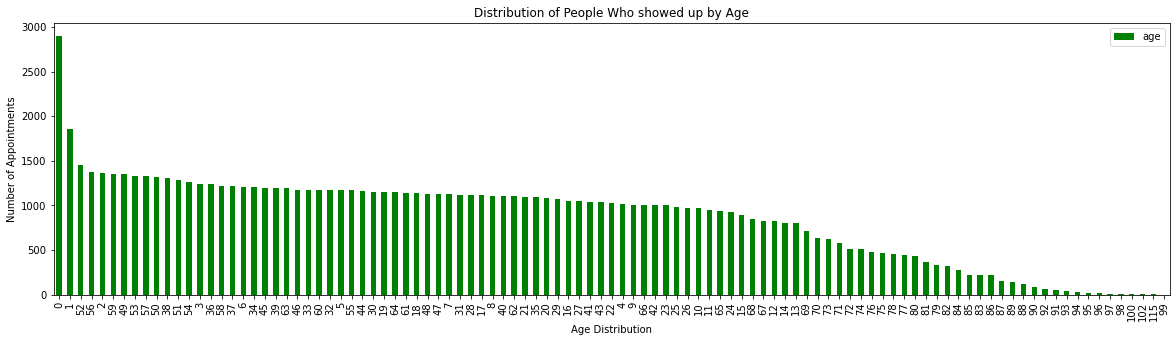

In [209]:
# Plotting People who did show up 
df_showed.age.value_counts(ascending=False).plot(kind='bar',figsize=[20, 5],color='g')
plt.xlabel('Age Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who showed up by Age")
plt.legend();

#### 3. Conclusion for Scholarship Attribute

In [210]:
# What is the mean of Scholarship for people who showed up or people who didn't show up to their appointments
df_noshow.scholarship.mean(), df_showed.scholarship.mean()

(0.11550696715802679, 0.09390411191855522)

In [211]:
# What is the percent of having a Scholarship for people who showed up or people who didn't show up to their appointments
df_noshow.scholarship.value_counts(normalize=True), df_showed.scholarship.value_counts(normalize=True)

(0    0.884493
 1    0.115507
 Name: scholarship, dtype: float64,
 0    0.906096
 1    0.093904
 Name: scholarship, dtype: float64)

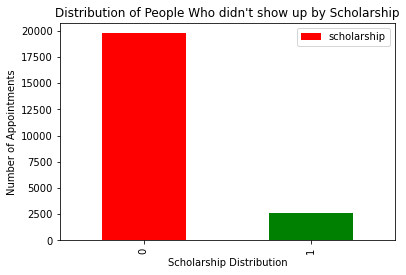

In [212]:
# Plotting People who didn't show up and dividing them into 2 groups: '0' = doesn't have scholarshiP, '1'= have scholarship
df_noshow.scholarship.value_counts().plot(kind='bar', color = ['r', 'g'])
plt.xlabel('Scholarship Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who didn't show up by Scholarship")
plt.legend();

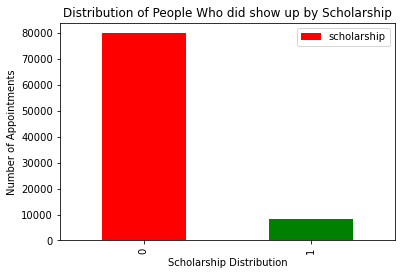

In [213]:
# Plotting People who did show up and dividing them into 2 groups: '0' = doesn't have scholarshiP, '1'= have scholarship
df_showed.scholarship.value_counts().plot(kind='bar', color = ['r', 'g'])
plt.xlabel('Scholarship Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who did show up by Scholarship")
plt.legend();

#### 4. Conclusion for Gender Attribute

In [214]:
# Percent of Females vs. Males
df['gender'].value_counts(normalize=True)

F    0.649974
M    0.350026
Name: gender, dtype: float64

In [215]:
# What is the max of Gender for people who showed up or people who didn't show up to their appointments
df_noshow.gender.max(), df_showed.gender.max()

('M', 'M')

In [216]:
# What is the min of Gender for people who showed up or people who didn't show up to their appointments
df_noshow.gender.min(), df_showed.gender.min()

('F', 'F')

In [217]:
# What is the percent of Gender for people who showed up or people who didn't show up to their appointments
df_noshow.gender.value_counts(normalize=True), df_showed.gender.value_counts(normalize=True)

(F    0.653882
 M    0.346118
 Name: gender, dtype: float64,
 F    0.648985
 M    0.351015
 Name: gender, dtype: float64)

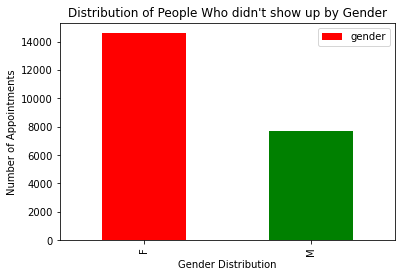

In [218]:
# Plotting People who didn't show up and dividing them into 2 groups: 'F' = Female , 'M' = Male
df_noshow.gender.value_counts().plot(kind='bar', color = ['r', 'g'])
plt.xlabel('Gender Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who didn't show up by Gender")
plt.legend();

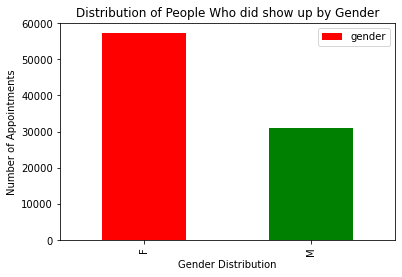

In [219]:
# Plotting People who did show up and dividing them into 2 groups: 'F' = Female , 'M' = Male
df_showed.gender.value_counts().plot(kind='bar', color = ['r', 'g'])
plt.xlabel('Gender Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who did show up by Gender")
plt.legend();

#### 5. Conclusion for Neighbourhood Attribute

In [220]:
# What is the percent of Neighbourhood for people who showed up or people who didn't show up to their appointments
df_noshow.neighbourhood.value_counts(normalize=True), df_showed.neighbourhood.value_counts(normalize=True)

(JARDIM CAMBURI                 0.065639
 MARIA ORTIZ                    0.054617
 ITARARÉ                        0.041355
 RESISTÊNCIA                    0.040593
 CENTRO                         0.031498
                                  ...   
 PONTAL DE CAMBURI              0.000538
 ILHA DO BOI                    0.000134
 ILHA DO FRADE                  0.000090
 ILHAS OCEÂNICAS DE TRINDADE    0.000090
 AEROPORTO                      0.000045
 Name: neighbourhood, Length: 80, dtype: float64,
 JARDIM CAMBURI       0.070879
 MARIA ORTIZ          0.051991
 RESISTÊNCIA          0.039963
 JARDIM DA PENHA      0.036800
 SANTA MARTHA         0.029873
                        ...   
 PONTAL DE CAMBURI    0.000646
 ILHA DO BOI          0.000363
 ILHA DO FRADE        0.000091
 AEROPORTO            0.000079
 PARQUE INDUSTRIAL    0.000011
 Name: neighbourhood, Length: 80, dtype: float64)

In [221]:
# What is Highest Neighbourhood of people who showed up or people who didn't show up to their appointments
df_noshow.neighbourhood.max(), df_showed.neighbourhood.max()

('VILA RUBIM', 'VILA RUBIM')

In [222]:
# What is the least Neighbourhood of people who showed up or people who didn't show up to their appointments
df_noshow.neighbourhood.min(), df_showed.neighbourhood.min()

('AEROPORTO', 'AEROPORTO')

<AxesSubplot:ylabel='neighbourhood'>

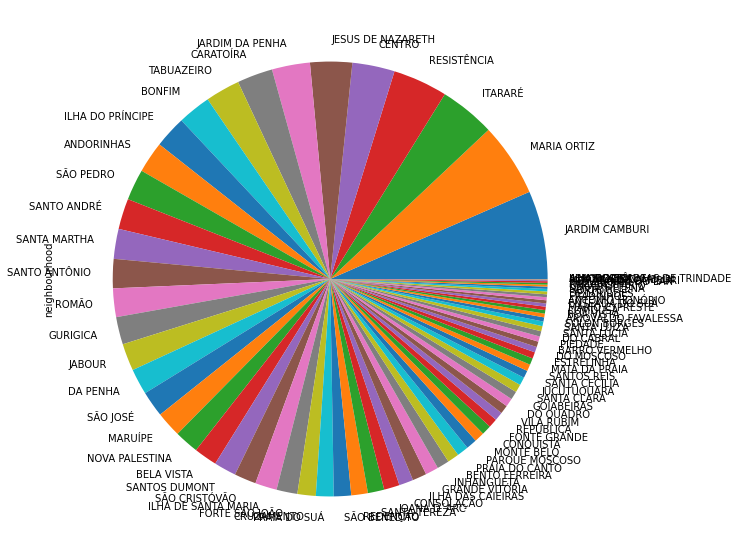

In [223]:
# Plotting People who didn't show up by Neighbourhood
df_noshow.neighbourhood.value_counts(normalize=True).plot(kind='pie', figsize=[20,10])

<AxesSubplot:ylabel='neighbourhood'>

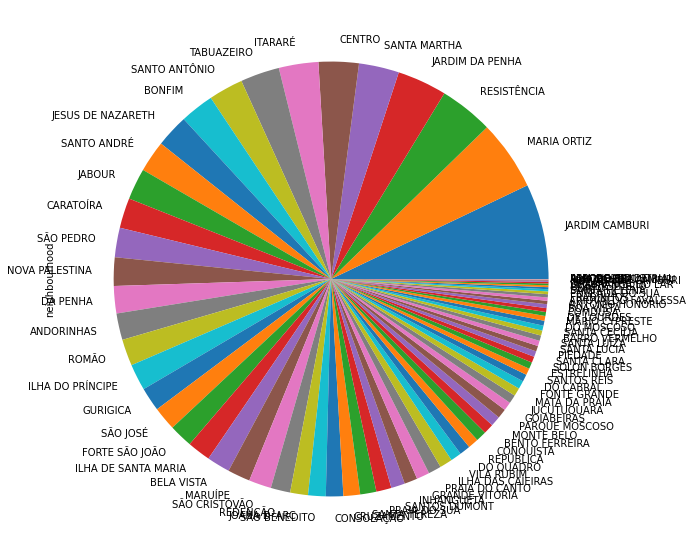

In [224]:
# Plotting People who did show up by Neighbourhood
df_showed.neighbourhood.value_counts(normalize=True).plot(kind='pie', figsize=[20,10])

#### 6. Conclusion for Disease Attributes

In [225]:
# What is the mean of Hipertension for people who showed up or people who didn't show up to their appointments
df_noshow.hipertension.mean(), df_showed.hipertension.mean()

(0.16900398763385457, 0.20439420907637715)

In [226]:
# What is the percent of having/not having Hipertension for people who showed up
# or people who didn't show up to their appointments
df_noshow.hipertension.value_counts(normalize=True), df_showed.hipertension.value_counts(normalize=True)

(0    0.830996
 1    0.169004
 Name: hipertension, dtype: float64,
 0    0.795606
 1    0.204394
 Name: hipertension, dtype: float64)

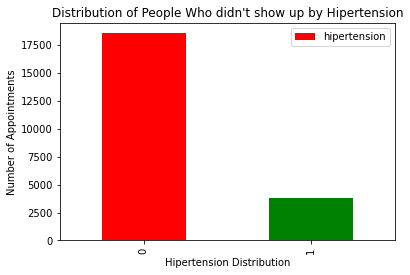

In [227]:
# Plotting People who didn't show up and dividing them into 2 groups: '0' = doesn't have Hipertension, '1'= have Hipertension
df_noshow.hipertension.value_counts().plot(kind='bar', color = ['r', 'g'])
plt.xlabel('Hipertension Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who didn't show up by Hipertension")
plt.legend();

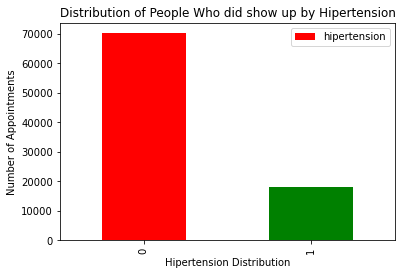

In [228]:
# Plotting People who did show up and dividing them into 2 groups: '0' = doesn't have Hipertension, '1'= have Hipertension
df_showed.hipertension.value_counts().plot(kind='bar', color = ['r', 'g'])
plt.xlabel('Hipertension Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who did show up by Hipertension")
plt.legend();

In [229]:
# What is the mean of Diabetes for people who showed up or people who didn't show up to their appointments
df_noshow.diabetes.mean(), df_showed.diabetes.mean()

(0.06407097092163627, 0.07383767728184838)

In [230]:
# What is the percent of having/not having Diabetes for people who showed up
# or people who didn't show up to their appointments
df_noshow.diabetes.value_counts(normalize=True), df_showed.diabetes.value_counts(normalize=True)

(0    0.935929
 1    0.064071
 Name: diabetes, dtype: float64,
 0    0.926162
 1    0.073838
 Name: diabetes, dtype: float64)

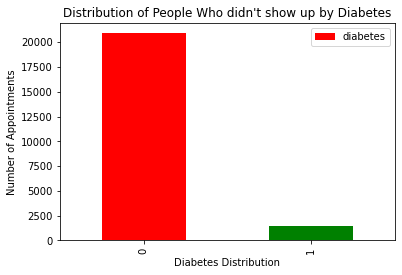

In [231]:
# Plotting People who didn't show up and dividing them into 2 groups: '0' = doesn't have Diabetes, '1'= have Diabetes
df_noshow.diabetes.value_counts().plot(kind='bar', color = ['r', 'g'])
plt.xlabel('Diabetes Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who didn't show up by Diabetes")
plt.legend();

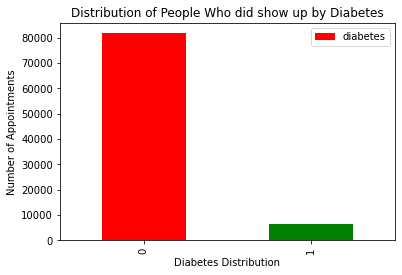

In [232]:
# Plotting People who did show up and dividing them into 2 groups: '0' = doesn't have Diabetes, '1'= have Diabetes
df_showed.diabetes.value_counts().plot(kind='bar', color = ['r', 'g'])
plt.xlabel('Diabetes Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who did show up by Diabetes")
plt.legend();

In [233]:
# What is the mean of Alcoholism for people who showed up or people who didn't show up to their appointments
df_noshow.alcoholism.mean(), df_showed.alcoholism.mean()

(0.030332900219543886, 0.03041708707925675)

In [234]:
# What is the percent of having/not having Alcoholism for people who showed up
# or people who didn't show up to their appointments
df_noshow.alcoholism.value_counts(normalize=True), df_showed.alcoholism.value_counts(normalize=True)

(0    0.969667
 1    0.030333
 Name: alcoholism, dtype: float64,
 0    0.969583
 1    0.030417
 Name: alcoholism, dtype: float64)

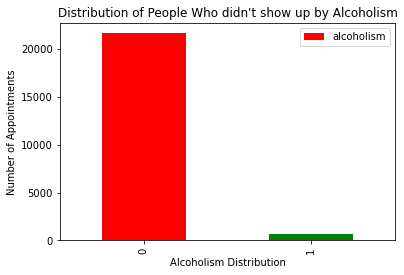

In [235]:
# Plotting People who didn't show up and dividing them into 2 groups: '0' = doesn't have Alcoholism, '1'= have Alcoholism
df_noshow.alcoholism.value_counts().plot(kind='bar', color = ['r', 'g'])
plt.xlabel('Alcoholism Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who didn't show up by Alcoholism")
plt.legend();

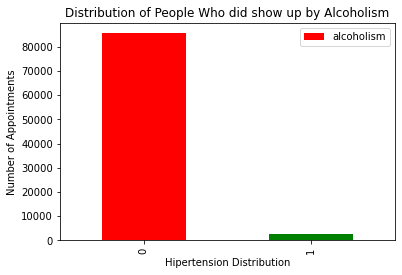

In [236]:
# Plotting People who did show up and dividing them into 2 groups: '0' = doesn't have Alcoholism, '1'= have Alcoholism
df_showed.alcoholism.value_counts().plot(kind='bar', color = ['r', 'g'])
plt.xlabel('Hipertension Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who did show up by Alcoholism")
plt.legend();

In [237]:
# What is the mean of Handcap for people who showed up or people who didn't show up to their appointments
df_noshow.handcap.mean(), df_showed.handcap.mean()

(0.02029660827097988, 0.022741959254934416)

In [238]:
# What is the percent of having/not having Handcap for people who showed up
# or people who didn't show up to their appointments
df_noshow.handcap.value_counts(normalize=True), df_showed.handcap.value_counts(normalize=True)

(0    0.981764
 1    0.016399
 2    0.001658
 3    0.000134
 4    0.000045
 Name: handcap, dtype: float64,
 0    0.979208
 1    0.019001
 2    0.001655
 3    0.000113
 4    0.000023
 Name: handcap, dtype: float64)

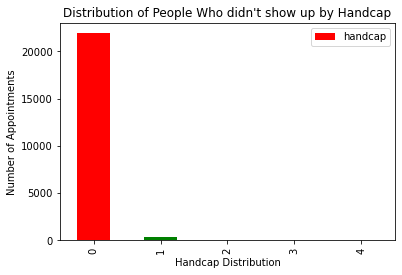

In [239]:
# Plotting People who didn't show up and dividing them into 2 groups: '0' = doesn't have Handcap, '1'= have Handcap
df_noshow.handcap.value_counts().plot(kind='bar', color = ['r', 'g'])
plt.xlabel('Handcap Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who didn't show up by Handcap")
plt.legend();

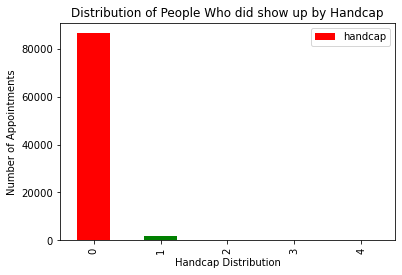

In [240]:
# Plotting People who did show up and dividing them into 2 groups: '0' = doesn't have Handcap, '1'= have Handcap
df_showed.handcap.value_counts().plot(kind='bar', color = ['r', 'g'])
plt.xlabel('Handcap Distribution')
plt.ylabel('Number of Appointments')
plt.title("Distribution of People Who did show up by Handcap")
plt.legend();

#### 7. Conclusion for Appointment and Scheduling Attributes

In [241]:
# What is the mean of Schedule Month for people who showed up or people who didn't show up to their appointments
df_noshow.schedule_month.mean(), df_showed.schedule_month.mean()

(4.59496393207581, 4.881778090174249)

In [242]:
# What is the mean of Appointment Month for people who showed up or people who didn't show up to their appointments
df_noshow.app_month.mean(), df_showed.app_month.mean()

(5.190375912899324, 5.2150169487682385)

In [243]:
# What is the percent of Schedule Months for people who showed up
# or people who didn't show up to their appointments
df_noshow.schedule_month.value_counts(normalize=False), df_showed.schedule_month.value_counts(normalize=True)

(5     11769
 4      7849
 6      1386
 3      1196
 2        82
 12       19
 1        18
 Name: schedule_month, dtype: int64,
 5     0.630925
 4     0.198284
 6     0.140159
 3     0.027413
 2     0.002256
 12    0.000476
 1     0.000476
 11    0.000011
 Name: schedule_month, dtype: float64)

In [244]:
# What is the percent of Appointment Months for people who showed up
# or people who didn't show up to their appointments
df_noshow.app_month.value_counts(normalize=True), df_showed.app_month.value_counts(normalize=True)

(5    0.752901
 6    0.218737
 4    0.028361
 Name: app_month, dtype: float64,
 5    0.725985
 6    0.244516
 4    0.029499
 Name: app_month, dtype: float64)

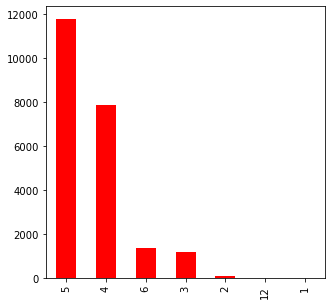

In [245]:
# Plotting distribution of people who didn't show up by Scheduling Month
df_noshow.schedule_month.value_counts().plot(kind='bar',figsize=[5,5],  color = 'r');

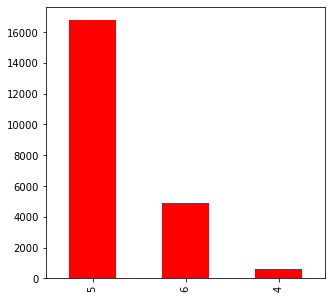

In [246]:
# Plotting distribution of people who didn't show up by Appointment Month
df_noshow.app_month.value_counts().plot(kind='bar',figsize=[5,5], color = 'r');

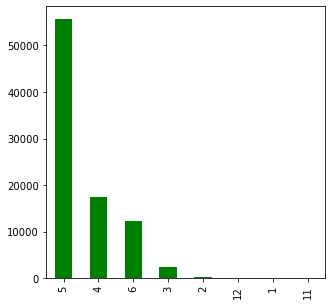

In [247]:
# Plotting distribution of people who did show up by Scheduling Month
df_showed.schedule_month.value_counts().plot(kind='bar',figsize=[5,5], color = 'g');

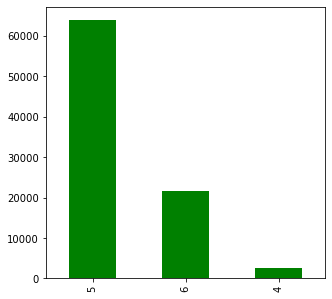

In [248]:
# Plotting distribution of people who did show up by Appointment Month
df_showed.app_month.value_counts().plot(kind='bar',figsize=[5,5], color = 'g');

In [249]:
# What is the mean of Schedule Day for people who showed up or people who didn't show up to their appointments
df_noshow.schedule_day.mean(), df_showed.schedule_day.mean()

(15.1172095523993, 14.033455394696565)

In [250]:
# What is the mean of Appointment Day for people who showed up or people who didn't show up to their appointments
df_noshow.app_day.mean(), df_showed.app_day.mean()

(12.567140104843407, 12.48233133424785)

In [251]:
# Summary Satistics of Appointment Day
df_noshow.schedule_day.describe(), df_showed.schedule_day.describe()

(count    22319.000000
 mean        15.117210
 std          9.249078
 min          1.000000
 25%          6.000000
 50%         15.000000
 75%         25.000000
 max         31.000000
 Name: schedule_day, dtype: float64,
 count    88207.000000
 mean        14.033455
 std          9.357300
 min          1.000000
 25%          6.000000
 50%         12.000000
 75%         20.000000
 max         31.000000
 Name: schedule_day, dtype: float64)

In [252]:
# Summary Satistics of Appointment Day
df_noshow.app_day.describe(), df_showed.app_day.describe()

(count    22319.000000
 mean        12.567140
 std          8.894275
 min          1.000000
 25%          5.000000
 50%         10.000000
 75%         19.000000
 max         31.000000
 Name: app_day, dtype: float64,
 count    88207.000000
 mean        12.482331
 std          9.097061
 min          1.000000
 25%          5.000000
 50%         10.000000
 75%         19.000000
 max         31.000000
 Name: app_day, dtype: float64)

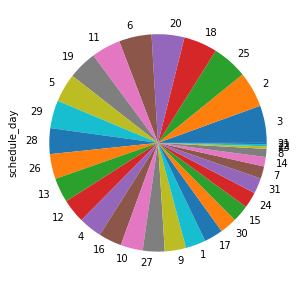

In [253]:
# Plotting distribution of people who didn't show up by Schedule Day
df_noshow.schedule_day.value_counts().plot(kind='pie',figsize=[5,5]);

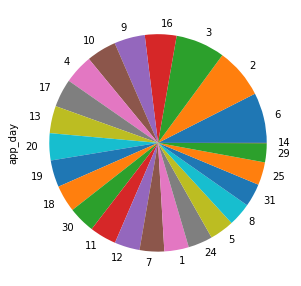

In [254]:
# Plotting distribution of people who didn't show up by Appointment Day
df_noshow.app_day.value_counts().plot(kind='pie',figsize=[5,5]);

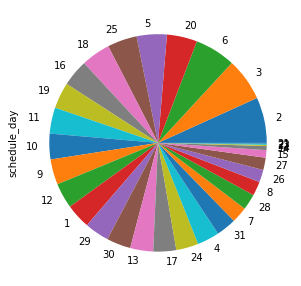

In [255]:
# Plotting distribution of people who did show up by Schedule Day
df_showed.schedule_day.value_counts().plot(kind='pie',figsize=[5,5]);

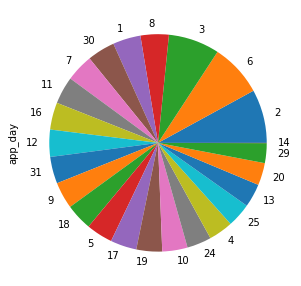

In [256]:
# Plotting distribution of people who did show up by Appointment Day
df_showed.app_day.value_counts().plot(kind='pie',figsize=[5,5]);

## Conclusions and Findings:
Finally, we can summarize our conclusions findings as follows:
1. **SMS Reseipt Correlation to No-showing up to Appointments:**
    * The mean of SMS received by people who didn't show up is `43.8` while that of people who did show up is `29.1`.
    * The percent of people who didn't receive SMS and didn't show up is `56.2%` and that of people who received SMS but didn't show up is `43.8%`.
    * The percent of people who didn't receive SMS but did show up is `70.9%` and that of people who received and did show up is `29.1%`.
    * **`Based on these statistics, we can conclude that SMS receiving is not highly associated with no-showing up to appointments.`**
2. **Age Correlation to No-showing up to Appointments:**
    * The mean age of people who didn't show up to appointments is `34` and that of people who did show up is `38`.
    * The most ages that didn't show up to their appointments are people `<= 30 years-old (1> = 28.6%, 1 = 18.6%, 17 = 17.8%, 19 = 17.7% and 30 = 16.5%)`.
    * The most ages that did show up to their appointments are people `<= 2 years-old and 52 and 65 years-old(1> = 32.8%, 1 = 21.1%, 52 = 16.4%, 65 = 15.6% and 2 = 15.5%)`.
    * **`Based on these statistics, we can conclude that Age is highly associated with no-showing up to appointments.`**
3. **Scholarship Correlation to No-showing up to Appointments:**
    * The mean scholarship ownership by people who didn't show up to appointments is `11.5%` and that of people who did show up to appointments is `9.3%`.
    * The percent of people who didn't show up to appointments and they don't own a scholarship is `88.4%` and that of people who did own a scholarship is `11.6%`.
    * The percent of people who did show up to appointments and they don't own a scholarship is `90.6%` and that of people who did own a scholarship is `9.3%`.
    * **`Based on these statistics, we can conclude that scholarship is highly associated with no-showing up to appointments. Considering the total number of appointments for thos who showed up and those who didn't and the percent of people who has a scholarship, we can find that scolarship can improve showing up by 3.18 folds (9.3% , which is the percent  of people who did show up and have a scholarship, counts for 2,589 appointments out of total 22,319 no-show appointments; 9.3%, which is the percent  of people who showed up as they have a scholarship counts for 8,203 appointments out of total 88,207 showed-up appointments. By dividing 8,203 / 2,589 = 3.18)`.**
4. **Gender Correlation to No-showing up to Appointments:**
    * The percent of Female of total appointmets is`65%` and `35%` for Males.
    * The percent of Females who didn't show up to appointments is `65.4%` and that of Males is `34.6%`.
    * The percent of Females who did show up to appointments is `64.9%` and that of Males is `35.1%`.
    * The max number of people who did/din't show up to their appointments is `Males`.
    * The min number of people who did/din't show up to their appointments is `Females`.
    * **`Based on these statistics, we can conclude that Gender is highly associated with no-showing up to appointments.`**
5. **Neighborhood Correlation to No-showing up to Appointments:**
    * The higher neighborhoods which didn't show up to their appointments are `JARDIM CAMBURI = 65.5%, MARIA ORTIZ = 54.6%, ITARARÉ = 41.3%, RESISTÊNCIA = 40.6%, and CENTRO = 31.1%`.
    * The higher neighborhoods which did show up to their appointments are `JARDIM CAMBURI = 70.9%, MARIA ORTIZ = 52%, RESISTÊNCIA = 40%, JARDIM DA PENHA = 36.8%, and SANTA MARTHA = 30%`.
    * The lowest neighborhood which didn't show up to appointments are `PONTAL DE CAMBURI, ILHA DO BOI, ILHA DO FRADE, ILHAS OCEÂNICAS DE TRINDADE, and AEROPORTO`.
    * The lowest neighborhood which did show up to appointments are `PONTAL DE CAMBURI, ILHA DO BOI, ILHA DO FRADE, AEROPORTO, and PARQUE INDUSTRIAL`.
    * The max neighborhood which did/didn't show up to appointments is `VILA RUBIM`.
    * The min neighborhood which did/didn't show up to appointments is `AEROPORTO`.
    * **`Based on these statistics, we can conclude that neighborhood is highly associated with no-showing up to appointments.`**
6. **Disease Correlation to No-showing up to Appointments:**
    * The mean number of people who suffers from Hipertension and didn't show up to their appointments is `17%` and that of people who did show up is `20.4%`.
    * The mean number of people who suffers from Diebetes and didn't show up to their appointments is `6.4%` and that of people who did show up is `7.4%`.
    * The mean number of people who suffers from Alcoholism and didn't show up to their appointments is `3%` and that of people who did show up is `3%`.
    * The mean number of people who suffers from Handcap and didn't show up to their appointments is `2%` and that of people who did show up is `2.2%`.
    * **`Based on these statistics, we can conclude that Hipertension is highly associated with no-showing up to appointments, Diebetes is moderately correlated to no-showing up to appointments and both Alcoholism and Handcap are lowerly correlated to no-showing up to appointments.`**
7. **Scheduling and Appointment Timing Correlation to No-showing up to Appointments:**
    * The mean of scheduling month for people who didn't show up to their appointments is `4.6` and that of people who showed up to their appointments is `4.9`.
    * The mean of Appointment month for people who didn't show up to their appointments is `5.19` and that of people who showed up to their appointments is `5.21`.
    * The percent of people who didn't show up to their appointments based on the scheduling month is `52.7% for month 5, 35% for month 4, 6.2% for month 6, 5.7% for month 3, 0.036% for month 2, 0.0085% for month 12, 0.0080% for month 1`.
    * The percent of people who did show up to their appointments based on the scheduling month is `63.1% for month 5, 19.8% for month 4, 14% for month 6, 2.7% for month 3, 0.022% for month 2, 0.0048% for month 12, 0.0048% for month 1 and 0.00011% for month 11`.
    * The percent of people who didn't show up to their appointments based on the appointment month is `75.3% for month 5, 21.9% for month 6, 28.4% for month 4`.
    * The percent of people who did show up to their appointments based on the appointment month is `72.6% for month 5, 24.4% for month 6, 29.5% for month 4`.
    * The mean of scheduling day for people who didn't show up to their appointments is `15` and that of people who showed up to their appointments is `14`.
    * The mean of appointment day for people who didn't show up to their appointments is `12` and that of people who showed up to their appointments is `12`.
    * `75% of Appointments` scheduled from day `1 up to day 19` for both people who did/didn't show up to their appointments and just `25%` of the appointments for both people who did/didn't show up to their appointments occurred from day` 21 up to 31`. This  can be linked to the last point of EDA which indicates that days `15, 21-23, and 26-28 have no appointments (i.e. there are 7 days in a month without appointments)`.
    * Roughly `40.8% of appointments for people who didn't show up for their appointments are scheduled before month 5`, while roughly `20% of appointmnets for people who did show up to their appointment scheduled befor month 5`, that is why data are skewed to the left in scheduling months.
    * The mean scheduling month is `4` and mean appointment month is `5`, while mean scheduling days is `14-15` and mean appointment day is `12`. 
    * **`Based on these statistics, we can conclude that Scheduling and Appointment timing is highly associated with no-showing up to appointments. Data of appointments is clustered around the mean day of 12 in the first 20 days and there are 7 days without appointments in the last 1 days of the month. Accordingly, there is a clear issue in scheduled appointments system.`**
    
    